In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
idx = pd.IndexSlice

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats

In [3]:
rs2020_df = pd.read_csv('../Week 03 - Combining and Validation/Retrosheet/GL2020.TXT',header=None,parse_dates=[0])
rs2020_df.columns = range(1,162)
rs2020_df.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,2020-07-23,0,Thu,SFN,NL,1,LAN,NL,1,1,8,51,N,NaN,NaN,NaN,LOS03,NaN,176,001000000,00010052x,32,8,0,0,0,1,0,1,0,0,0,8,0,0,1,0,5,6,8,8,0,0,24,12,1,0,1,0,37,...,sandp001,Pablo Sandoval,3,dicka001,Alex Dickerson,7,pench001,Hunter Pence,10,mccaj002,Joe McCarthy,9,dubom001,Mauricio Dubon,4,crawb001,Brandon Crawford,6,heint001,Tyler Heineman,2,muncm001,Max Muncy,3,bettm001,Mookie Betts,9,bellc002,Cody Bellinger,8,turnj001,Justin Turner,5,seagc001,Corey Seager,6,herne001,Enrique Hernandez,4,pedej001,Joc Pederson,7,polla001,A.J. Pollock,10,barna001,Austin Barnes,2,NaN,Y
1,2020-07-23,0,Thu,NYA,AL,1,WAS,NL,1,4,1,31,N,NaN,NaN,NaN,WAS11,NaN,103,201010,10000x,22,6,1,0,1,4,0,0,0,4,0,11,0,0,0,0,6,1,1,1,0,0,15,1,0,0,0,0,16,...,torrg001,Gleyber Torres,6,stanm004,Giancarlo Stanton,10,gardb001,Brett Gardner,7,sancg002,Gary Sanchez,2,voitl001,Luke Voit,3,urshg001,Giovanny Urshela,5,wadet002,Tyler Wade,4,turnt001,Trea Turner,6,eatoa002,Adam Eaton,9,casts001,Starlin Castro,4,kendh001,Howie Kendrick,10,thame001,Eric Thames,3,suzuk001,Kurt Suzuki,2,cabra002,Asdrubal Cabrera,5,steva001,Andrew Stevenson,7,roblv001,Victor Robles,8,NaN,Y


In [4]:
rs2021_df = pd.read_csv('../Week 03 - Combining and Validation/Retrosheet/GL2021.TXT',header=None,parse_dates=[0])
rs2021_df.columns = range(1,162)
rs2021_df.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,2021-04-01,0,Thu,PIT,NL,1,CHN,NL,1,5,3,54,D,NaN,NaN,NaN,CHI11,10343.0,240,210010100,101000010,35,9,2,0,1,5,0,0,1,11,0,10,3,1,0,0,15,7,2,2,1,0,27,8,2,0,0,0,26,...,reynb001,Bryan Reynolds,7,morac001,Colin Moran,3,newmk001,Kevin Newman,6,polag001,Gregory Polanco,9,stalj001,Jacob Stallings,2,alfoa002,Anthony Alford,8,kuhlc001,Chad Kuhl,1,happi001,Ian Happ,8,contw001,Willson Contreras,2,rizza001,Anthony Rizzo,3,bryak001,Kris Bryant,5,pedej001,Joc Pederson,7,baezj001,Javier Baez,6,heywj001,Jason Heyward,9,boted002,David Bote,4,hendk001,Kyle Hendricks,1,NaN,Y
1,2021-04-01,0,Thu,SLN,NL,1,CIN,NL,1,11,6,54,D,NaN,NaN,NaN,CIN09,12264.0,211,610400000,102120000,37,10,2,0,2,9,0,0,1,3,0,7,0,0,1,0,3,6,6,6,1,0,27,4,0,0,1,0,34,...,arenn001,Nolan Arenado,5,dejop001,Paul DeJong,6,oneit001,Tyler O'Neill,7,moliy001,Yadier Molina,2,carld002,Dylan Carlson,8,willj006,Justin Williams,9,flahj002,Jack Flaherty,1,winkj002,Jesse Winker,7,castn001,Nick Castellanos,9,vottj001,Joey Votto,3,suare001,Eugenio Suarez,6,mousm001,Mike Moustakas,5,senzn001,Nick Senzel,8,indij001,Jonathan India,4,barnt001,Tucker Barnhart,2,castl003,Luis Castillo,1,NaN,Y


In [5]:
rs_df = pd.concat([rs2020_df,rs2021_df])
rs_df['Year'] = rs_df[1].dt.year
rs_df['Month'] = rs_df[1].dt.month
rs_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,Year,Month
0,2020-07-23,0,Thu,SFN,NL,1,LAN,NL,1,1,8,51,N,NaN,NaN,NaN,LOS03,NaN,176,001000000,00010052x,32,8,0,0,0,1,0,1,0,0,0,8,0,0,1,0,5,6,8,8,0,0,24,12,1,0,1,0,37,...,3,dicka001,Alex Dickerson,7,pench001,Hunter Pence,10,mccaj002,Joe McCarthy,9,dubom001,Mauricio Dubon,4,crawb001,Brandon Crawford,6,heint001,Tyler Heineman,2,muncm001,Max Muncy,3,bettm001,Mookie Betts,9,bellc002,Cody Bellinger,8,turnj001,Justin Turner,5,seagc001,Corey Seager,6,herne001,Enrique Hernandez,4,pedej001,Joc Pederson,7,polla001,A.J. Pollock,10,barna001,Austin Barnes,2,NaN,Y,2020,7
1,2020-07-23,0,Thu,NYA,AL,1,WAS,NL,1,4,1,31,N,NaN,NaN,NaN,WAS11,NaN,103,201010,10000x,22,6,1,0,1,4,0,0,0,4,0,11,0,0,0,0,6,1,1,1,0,0,15,1,0,0,0,0,16,...,6,stanm004,Giancarlo Stanton,10,gardb001,Brett Gardner,7,sancg002,Gary Sanchez,2,voitl001,Luke Voit,3,urshg001,Giovanny Urshela,5,wadet002,Tyler Wade,4,turnt001,Trea Turner,6,eatoa002,Adam Eaton,9,casts001,Starlin Castro,4,kendh001,Howie Kendrick,10,thame001,Eric Thames,3,suzuk001,Kurt Suzuki,2,cabra002,Asdrubal Cabrera,5,steva001,Andrew Stevenson,7,roblv001,Victor Robles,8,NaN,Y,2020,7
2,2020-07-24,0,Fri,MIL,NL,1,CHN,NL,1,0,3,51,N,NaN,NaN,NaN,CHI11,NaN,150,000000000,00200001x,30,3,0,0,0,0,0,0,0,0,0,9,0,0,0,0,3,5,3,3,0,0,24,11,1,0,2,0,28,...,4,smoaj001,Justin Smoak,3,braur002,Ryan Braun,10,garca003,Avisail Garcia,9,narvo001,Omar Narvaez,2,cainl001,Lorenzo Cain,8,arcio002,Orlando Arcia,6,bryak001,Kris Bryant,5,rizza001,Anthony Rizzo,3,baezj001,Javier Baez,6,schwk001,Kyle Schwarber,7,contw001,Willson Contreras,2,heywj001,Jason Heyward,9,carav001,Victor Caratini,10,hoern001,Nico Hoerner,4,happi001,Ian Happ,8,NaN,Y,2020,7
3,2020-07-24,0,Fri,DET,AL,1,CIN,NL,1,1,7,51,N,NaN,NaN,NaN,CIN09,NaN,165,000100000,20101120x,28,3,0,0,1,1,0,0,0,3,0,13,0,0,2,0,3,5,7,7,0,0,24,9,0,0,2,0,31,...,10,cronc002,C.J. Cron,3,stewc002,Christin Stewart,7,candj002,Jeimer Candelario,5,maybc001,Cameron Maybin,9,romia002,Austin Romine,2,jonej006,JaCoby Jones,8,ervip001,Phillip Ervin,7,vottj001,Joey Votto,3,suare001,Eugenio Suarez,5,castn001,Nick Castellanos,9,mousm001,Mike Moustakas,4,davim005,Matt Davidson,10,senzn001,Nick Senzel,8,galvf001,Freddy Galvis,6,casac001,Curt Casali,2,NaN,Y,2020,7
4,2020-07-24,0,Fri,SFN,NL,2,LAN,NL,2,1,9,51,N,NaN,NaN,NaN,LOS03,NaN,175,001000000,11011122x,31,4,0,0,1,1,0,0,0,1,0,9,0,0,1,0,4,5,6,6,0,0,24,8,4,0,0,0,37,...,3,dicka001,Alex Dickerson,10,mccaj002,Joe McCarthy,7,dubom001,Mauricio Dubon,4,crawb001,Brandon Crawford,6,davij008,Jaylin Davis,9,branr002,Rob Brantly,2,bettm001,Mookie Betts,9,muncm001,Max Muncy,3,turnj001,Justin Turner,5,bellc002,Cody Bellinger,8,herne001,Enrique Hernandez,4,seagc001,Corey Seager,6,taylc001,Chris Taylor,7,pedej001,Joc Pederson,10,smitw003,Will Smith,2,NaN,Y,2020,7


## Duration by team

In [7]:
duration_df = rs_df.groupby(['Year','Month',7]).agg({19:'mean'})[19].unstack(7)
duration_df.loc[idx[:,4:9],:]

7                  ANA         ARI         ATL         BAL         BOS  \
Year Month                                                               
2020 7      215.500000  197.000000  192.333333  198.000000  188.200000   
     8      199.142857  191.375000  183.153846  191.857143  209.307692   
     9      188.500000  187.416667  204.071429  173.538462  209.916667   
2021 4      197.800000  191.111111  184.000000  174.357143  190.125000   
     5      189.647059  190.062500  188.785714  189.454545  188.769231   
     6      199.846154  200.545455  191.714286  186.615385  196.571429   
     7      195.066667  200.533333  189.750000  195.100000  193.666667   
     8      184.454545  195.000000  186.583333  186.866667  206.583333   
     9      192.200000  194.923077  201.090909  187.611111  207.928571   

7                  CHA         CHN         CIN         CLE         COL  \
Year Month                                                               
2020 7      208.666667  194.000000  190.166667  178.166667  217.000000   
     8      179.705882  189.357143  186.181818  187.200000  186.833333   
     9      195.300000  184.250000  169.923077  185.428571  192.272727   
2021 4      182.846154  205.066667  196.000000  186.000000  186.333333   
     5      185.687500  194.928571  197.333333  175.833333  195.692308   
     6      185.133333  182.800000  190.428571  182.636364  191.875000   
     7      186.200000  205.846154  212.846154  187.461538  192.444444   
     8      193.866667  193.923077  180.000000  190.250000  186.750000   
     9      195.000000  196.750000  197.133333  169.500000  199.062500   

7                  DET         HOU         KCA         LAN         MIA  \
Year Month                                                               
2020 7      165.000000  205.000000  176.000000  188.750000         NaN   
     8      171.785714  179.076923  188.923077  176.166667  177.846154   
     9      184.666667  170.090909  184.625000  187.928571  170.882353   
2021 4      174.769231  196.285714  183.923077  198.461538  192.818182   
     5      190.533333  205.875000  193.923077  187.071429  191.000000   
     6      191.000000  198.916667  190.363636  194.928571  189.416667   
     7      172.076923  190.500000  179.687500  202.800000  207.923077   
     8      187.133333  209.000000  197.818182  189.176471  193.176471   
     9      195.846154  205.000000  204.142857  186.800000  201.833333   

7                  MIL         MIN         NYA         NYN         OAK  \
Year Month                                                               
2020 7             NaN  173.250000  188.000000  199.800000  181.166667   
     8      181.812500  186.666667  189.294118  182.333333  183.636364   
     9      172.857143  191.214286  181.583333  198.384615  172.615385   
2021 4      190.857143  183.818182  195.333333  178.454545  185.666667   
     5      207.384615  189.055556  182.533333  183.700000  180.210526   
     6      203.294118  202.272727  200.866667  178.733333  176.181818   
     7      192.444444  194.357143  200.375000  174.941176  187.555556   
     8      212.416667  190.769231  191.214286  189.642857  194.928571   
     9      199.375000  182.785714  204.428571  208.642857  186.000000   

7                  PHI         PIT         SDN         SEA         SFN  \
Year Month                                                               
2020 7      196.000000  206.000000  197.500000  154.000000  196.000000   
     8      189.812500  199.545455  182.857143  173.714286  191.692308   
     9      194.909091  183.062500  174.500000  178.400000  191.769231   
2021 4      190.461538  197.100000  202.857143  194.583333  174.076923   
     5      197.916667  187.533333  194.285714  178.058824  182.666667   
     6      215.000000  189.916667  200.529412  179.272727  187.533333   
     7      184.866667  202.400000  198.250000  201.187500  191.285714   
     8      197.933333  190.428571  206.384615  196.916667  188.250000   


In [10]:
duration_df_stack = duration_df.stack().reset_index()
duration_df_stack.columns = ['Year','Month','Team','Duration']
duration_df_stack

,Year,Month,Team,Duration
0,2020,7,ANA,215.500000
1,2020,7,ARI,197.000000
2,2020,7,ATL,192.333333
3,2020,7,BAL,198.000000
4,2020,7,BOS,188.200000
...,...,...,...,...
278,2021,10,SFN,189.000000
279,2021,10,SLN,180.333333
280,2021,10,TEX,176.666667
281,2021,10,TOR,181.333333


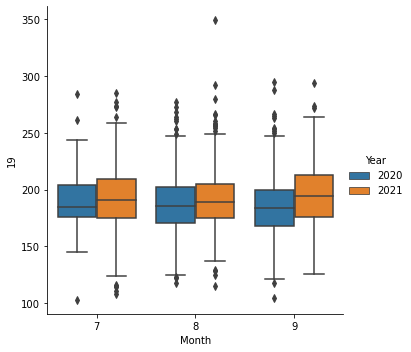

In [11]:
c0 = rs_df['Year']>2019
c1 = rs_df['Month']<10
c2 = rs_df['Month']>6
_df = rs_df[c0 & c1 & c2]

sb.catplot(data=_df,x='Month',y=19,hue='Year',kind='box')

plt.savefig('month_20_21.png',facecolor='w')

In [12]:
c_20 = rs_df['Year'] == 2020
c_21 = rs_df['Year'] == 2021

c_jul = rs_df['Month'] == 7
c_aug = rs_df['Month'] == 8
c_sep = rs_df['Month'] == 9

durations_jul_20 = rs_df.loc[c_20 & c_jul,19]
durations_jul_21 = rs_df.loc[c_21 & c_jul,19]

durations_aug_20 = rs_df.loc[c_20 & c_aug,19]
durations_aug_21 = rs_df.loc[c_21 & c_aug,19]

durations_sep_20 = rs_df.loc[c_20 & c_sep,19]
durations_sep_21 = rs_df.loc[c_21 & c_sep,19]

In [13]:
stats.ttest_ind(durations_jul_20,durations_jul_21) 

Ttest_indResult(statistic=-0.4078425771186022, pvalue=0.6835737899272406)

In [14]:
stats.ttest_ind(durations_aug_20,durations_aug_21) 

Ttest_indResult(statistic=-2.8036138695444492, pvalue=0.005173132411375626)

In [15]:
stats.ttest_ind(durations_sep_20,durations_sep_21) 

Ttest_indResult(statistic=-5.1307395635021775, pvalue=3.6369914091585047e-07)

In [16]:
diff_df = rs_df.groupby(['Year',7]).agg({19:'mean'})[19].unstack('Year')[[2020,2021]]
diff_df['Difference in minutes'] = diff_df[2021] - diff_df[2020]
diff_df = diff_df.sort_values('Difference in minutes',ascending=False)
diff_df['Difference in minutes']

7
MIL    23.539506
MIA    21.223457
HOU    20.477778
SDN    20.323457
SEA    16.192593
CIN    15.449383
SLN    13.654321
DET    10.619048
LAN     9.641975
CHN     9.325926
NYA     9.277778
OAK     6.596296
ARI     5.376543
PHI     5.008642
KCA     4.997531
MIN     3.246914
COL     2.351852
BAL     1.664198
PIT     1.390123
CHA     0.298765
WAS    -1.124691
CLE    -2.714815
ANA    -4.004938
SFN    -4.114815
ATL    -4.433333
TEX    -5.217284
TBA    -5.469136
NYN    -6.632099
BOS    -8.971605
TOR    -9.454321
Name: Difference in minutes, dtype: float64

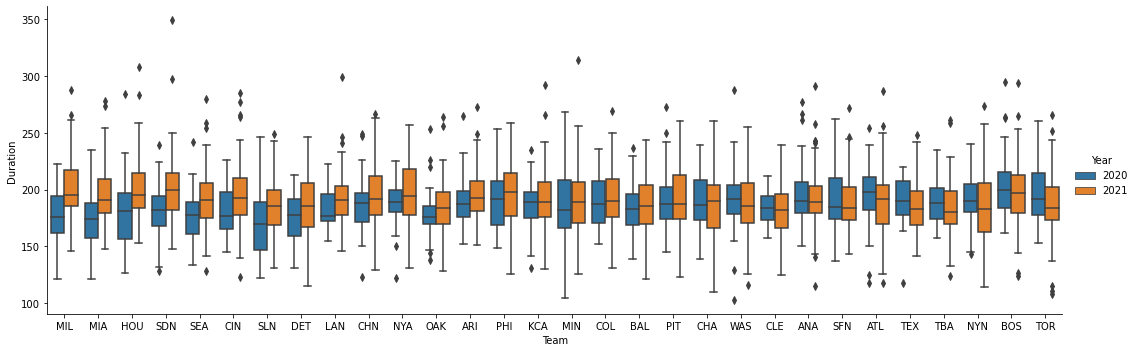

In [17]:
rs_20_21_df = rs_df.loc[rs_df['Year'].isin([2020,2021]),[7,19,'Year','Month']]
rs_20_21_df.columns = ['Team','Duration','Year','Month']
sb.catplot(
    data=rs_20_21_df,
    x='Team',
    y='Duration',
    hue='Year',
    kind='box',
    aspect=3,
    order=diff_df.index
)

plt.savefig('duration_by_team_ordered.png',facecolor='w')